In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('~/desktop/ttp2/python/ccrb_complaint_data/nypd_data.csv')
pd.set_option('display.max_columns',None)

In [11]:
df.head()

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,rank_abbrev_incident,rank_abbrev_now,rank_now,rank_incident,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,42835,7,2019,5,2020,078 PCT,POM,POM,Police Officer,Police Officer,Hispanic,M,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,26146,7,2012,9,2013,PBBS,POM,POM,Police Officer,Police Officer,White,M,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,40253,8,2018,2,2019,078 PCT,POF,POF,Police Officer,Police Officer,Hispanic,F,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


In [75]:
#grouped= df.groupby('unique_mos_id')
#pd.melt(df, id_vars=['unique_mos_id','complaint_id'], value_vars=['month_received'])
moseth= df.groupby(['mos_ethnicity'])
#moseth.mean().round(2)
#competh= df.groupby(['complainant_ethnicity'])
#competh.mean().round(2)
#moseth.complaint_id.count()
moseth.count().round(2)

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,rank_abbrev_incident,rank_abbrev_now,rank_now,rank_incident,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
mos_ethnicity,,,,,,,,,,,,,,,,,,,,,,,,,
American Indian,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,30,30,25,32,32,32,32,32,32
Asian,1178,1178,1178,1178,1178,1178,1178,1178,1178,1164,1178,1178,1178,1178,1178,1178,1050,1064,1048,1178,1178,1178,1166,1173,1178
Black,4924,4924,4924,4924,4924,4924,4924,4924,4924,4727,4924,4924,4924,4924,4924,4924,4314,4355,4253,4924,4924,4924,4897,4920,4924
Hispanic,9150,9150,9150,9150,9150,9150,9150,9150,9150,8953,9150,9150,9150,9150,9150,9150,8213,8287,8102,9150,9150,9149,9107,9129,9150
White,18074,18074,18074,18074,18074,18074,18074,18074,18074,16938,18074,18074,18074,18074,18074,18074,15287,15427,15118,18074,18073,18051,17957,18048,18074


In [55]:
competh= df.groupby(['complainant_ethnicity'])
complaint_id_count= df.complaint_id.count()
competh.complaint_id.count()
#df.complaint_id.count()


complainant_ethnicity
American Indian       64
Asian                532
Black              17114
Hispanic            6424
Other Race           677
Refused              259
Unknown             1041
White               2783
Name: complaint_id, dtype: int64

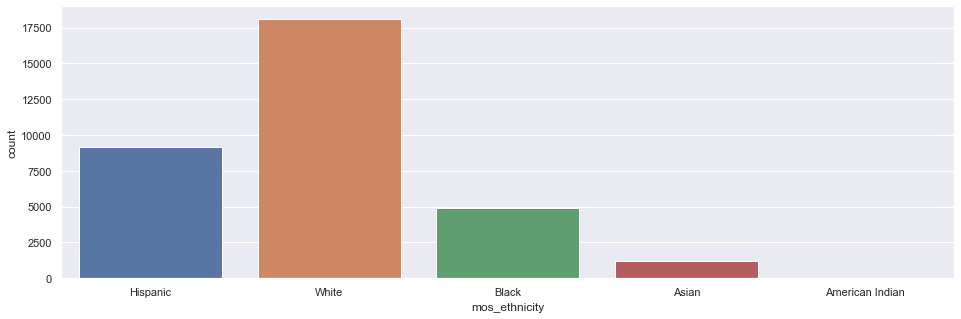

In [57]:
sns.set(rc={'figure.figsize': (16, 5)})
ax = sns.countplot(x = 'mos_ethnicity', 
                 data = df)

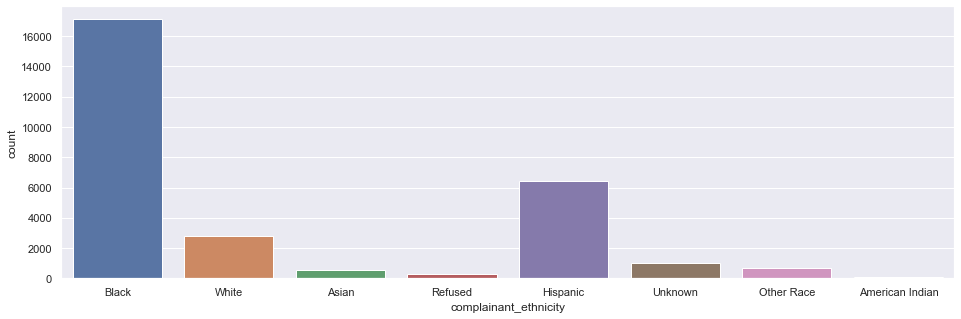

In [49]:
sns.set(rc={'figure.figsize': (16, 5)})
bx = sns.countplot(x = 'complainant_ethnicity', 
                 data = df,)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33358 entries, 0 to 33357
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unique_mos_id             33358 non-null  int64  
 1   first_name                33358 non-null  object 
 2   last_name                 33358 non-null  object 
 3   command_now               33358 non-null  object 
 4   complaint_id              33358 non-null  int64  
 5   month_received            33358 non-null  int64  
 6   year_received             33358 non-null  int64  
 7   month_closed              33358 non-null  int64  
 8   year_closed               33358 non-null  int64  
 9   command_at_incident       31814 non-null  object 
 10  rank_abbrev_incident      33358 non-null  object 
 11  rank_abbrev_now           33358 non-null  object 
 12  rank_now                  33358 non-null  object 
 13  rank_incident             33358 non-null  object 
 14  mos_et

In [62]:
mosgender= df.groupby(['mos_gender'])
mosgender.complaint_id.count()

mos_gender
F     1760
M    31598
Name: complaint_id, dtype: int64

In [69]:
df.mos_gender.count()

33358

In [107]:
precinct_complaint= precinct['complaint_id'].count()
precinct_complaint

precinct
0.0        21
1.0       174
5.0       160
6.0       175
7.0       221
         ... 
120.0     844
121.0     366
122.0     238
123.0     112
1000.0      3
Name: complaint_id, Length: 79, dtype: int64